In [3]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv(r"E:\projects\Project  German Credit\german.csv",header=None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [6]:
data.shape

(1000, 21)

In [7]:
data.isnull().any().sum()

0

# Lets Check Dublicate

In [8]:
x1 = data.duplicated()

In [9]:
x1.any()

False

In [10]:
data[20].value_counts()

1    700
2    300
Name: 20, dtype: int64

In [11]:
num_ix = data.select_dtypes(include=['int64', 'float64']).columns

In [12]:
subset = data[num_ix]

In [13]:
subset

,1,4,7,10,12,15,17,20
0,6,1169,4,4,67,2,1,1
1,48,5951,2,2,22,1,1,2
2,12,2096,2,3,49,1,2,1
3,42,7882,2,4,45,1,2,1
4,24,4870,3,4,53,2,2,2
...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1
996,30,3857,4,4,40,1,1,1
997,12,804,4,4,38,1,1,1
998,45,1845,4,4,23,1,1,2


In [14]:
from matplotlib import pyplot
ax = subset.hist()
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
pyplot.show()

<Figure size 640x480 with 9 Axes>

# Model Test and Baseline Result

Put another way, we are interested in the F-measure that will summarize a model's ability
to minimize misclassification errors for the positive class, but we want to favor models that are
better are minimizing false negatives over false positives. This can be achieved by using a version
of the F-measure that calculates a weighted harmonic mean of precision and recall but favors
higher recall scores over precision scores. This is called the Fbeta-measure, a generalization of
F-measure, where beta is a parameter that defines the weighting of the two scores. A beta value
of 2 will weight more attention on recall than precision and is referred to as the F2-measure.

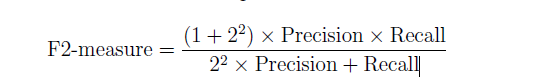

In [15]:
from PIL import Image
# load the image
image = Image.open("image-f2.PNG")
image

In [16]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [17]:
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

In [18]:
cat_ix = x.select_dtypes(include=['object', 'bool']).columns

In [19]:
cat_ix

Int64Index([0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19], dtype='int64')

In [20]:
ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
x = ct.fit_transform(x)

In [21]:
x

array([[ 1.,  0.,  0., ..., 67.,  2.,  1.],
       [ 0.,  1.,  0., ..., 22.,  1.,  1.],
       [ 0.,  0.,  0., ..., 49.,  1.,  2.],
       ...,
       [ 0.,  0.,  0., ..., 38.,  1.,  1.],
       [ 1.,  0.,  0., ..., 23.,  1.,  1.],
       [ 0.,  1.,  0., ..., 27.,  1.,  1.]])

In [22]:
x.shape

(1000, 61)

In [23]:
y = LabelEncoder().fit_transform(y)

In [24]:
model = DummyClassifier(strategy='constant', constant=1)


In [25]:
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

In [28]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the model evaluation metric
metric = make_scorer(f2_measure)
# evaluate model
scores = cross_val_score(model, x, y, scoring=metric, cv=cv, n_jobs=-1)

In [29]:
mean(scores)

0.6818181818181821

# Evaluate Machine Learning Algorithms

In [55]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC

In [63]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [64]:
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='liblinear'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # NB
    models.append(GaussianNB())
    names.append('NB')
    # GPC
    models.append(GaussianProcessClassifier())
    names.append('GPC')
    # SVM
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    return models, names

In [57]:
models, names = get_models()
results = list()

In [65]:
for i in range(len(models)):
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
    # wrap the model in a pipeline
    pipeline = Pipeline(steps=[('t',ct),('m',models[i])])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(f2_measure)
    # evaluate model
    scores = cross_val_score(pipeline, X, y, scoring=metric, cv=cv, n_jobs=-1)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>LR 0.864 (0.027)
>LDA 0.860 (0.029)
>NB 0.721 (0.128)
>GPC 0.866 (0.028)
>SVM 0.878 (0.026)


# Evaluate Undersampling

In [68]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import OneSidedSelection

In [79]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2


In [80]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [82]:
y = LabelEncoder().fit_transform(y)

In [83]:
cat_ix = x.select_dtypes(include=['object', 'bool']).columns
num_ix = x.select_dtypes(include=['int64', 'float64']).columns

In [84]:
# define undersampling models to test
def get_models():
    models, names = list(), list()
    # TL
    models.append(TomekLinks())
    names.append('TL')
    # ENN
    models.append(EditedNearestNeighbours())
    names.append('ENN')
    # RENN
    models.append(RepeatedEditedNearestNeighbours())
    names.append('RENN')
    # OSS
    models.append(OneSidedSelection())
    names.append('OSS')
    # NCR
    models.append(NeighbourhoodCleaningRule())
    names.append('NCR')
    return models, names

In [85]:
models, names = get_models()
results = list()

In [86]:
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(f2_measure)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

In [87]:
# define model to evaluate
for i in range(len(models)):
    model = LogisticRegression(solver='liblinear')
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
    # scale, then undersample, then fit model
    pipeline = Pipeline(steps=[('t',ct), ('s', models[i]), ('m',model)])
    # evaluate the model and store results
    scores = evaluate_model(x, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>TL 0.525 (0.065)
>ENN 0.694 (0.053)
>RENN 0.716 (0.042)
>OSS 0.530 (0.063)
>NCR 0.685 (0.058)
